## Верификация человека на фотографии. 
### Используем библиотеку dlib для анализа изображений, cv2 для загрузки/выгрузки изображений и distance из scipy.spatial для измерения евклидово расстояния.

In [1]:
import dlib
import cv2
from matplotlib import pyplot as plt
import numpy as np
from scipy.spatial import distance

### Создадим модели для распознования на уже обученных алгоритмах

In [2]:
sp = dlib.shape_predictor('trained data/shape_predictor_68_face_landmarks.dat')
facerec = dlib.face_recognition_model_v1('trained data/dlib_face_recognition_resnet_model_v1.dat')
detector = dlib.get_frontal_face_detector()

### Загрузим 1 изображение

(531, 413, 3)


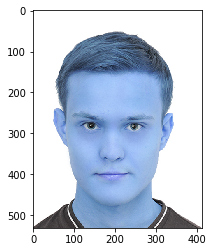

In [3]:
img1 = cv2.imread('etalon.jpg',1)
print(np.shape(img1))
plt.imshow(img1)

### Импортируем следующии файлы для обработки и распознования

In [4]:
from Preprocessing import Preprocessing as pr
import metrics as mt
import Data

### Выполним предобработку 1 изображения и получим вектор из 128 характеристик

In [5]:
pr_img1 = pr(sp,facerec,detector,img1)
pr_img1.preprocessing_image()
pre_img1_vector = pr_img1.get_predict_vector()
np.shape(pre_img1_vector) # проверим форму вектора

(128, 1)

### Выполним все тоже самое для 2-го изображения

(2048, 1529, 3)


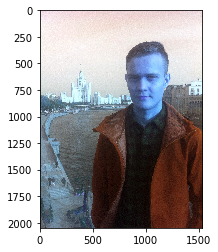

In [6]:
img2 = cv2.imread('compare.jpg',1)
print(np.shape(img2))
plt.imshow(img2)

In [7]:
pr_img2 = pr(sp,facerec,detector,img2)
pr_img2.preprocessing_image()
pre_img2_vector = pr_img2.get_predict_vector()
np.shape(pre_img2_vector) # проверим форму вектора

(128, 1)

### Теперь сравним насколько похожи 2 изображения

In [8]:
pr_img1.compare_percent(pre_img2_vector)

57.87868804636893

### Как видно наши 2 изображения похожи на 57%. 
### Теперь узнаем порог при котором можно судить о совпадение личностей на 2 изображениях
#### Загрузим 2 файла. target - содержит результаты сравнения 2 одинаковых людей,  imagine -  содержит результаты сравнения 2 разных людей. 

In [9]:
target = Data.get_data_from_file('target.txt')
imagine = Data.get_data_from_file('imagine.txt')

print(np.shape(target))
print(np.shape(imagine))

(182,)
(182,)


### Вычислим следующие показатели:
- FRR (False Rejection Rate) — доля неправильно отклонённых target-попыток.
- FAR (False Acceptance Rate) — доля неправильно принятых imposter-попыток.
- EER (Equal Error Rate) = argmin |FAR- FRR| - Равная Частота Ошибок

In [10]:
eer, fars, frrs, dists = mt.calc_metrics(target,imagine)
print ('eer = '+str(eer))
print ('shape_far = '+str(np.shape(fars)))
print ('shape_frr = '+str(np.shape(frrs)))

eer = 0.0027472527472527475
shape_far = (100,)
shape_frr = (100,)


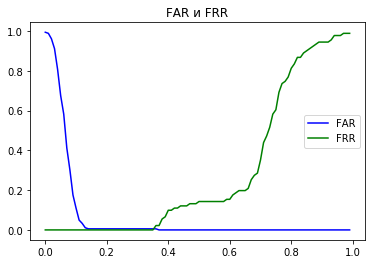

In [11]:
plt.plot(np.arange(100)*(1/100),fars,color = 'b',label='FAR')
plt.plot(np.arange(100)*(1/100),frrs, color = 'g',label='FRR')
plt.title('FAR и FRR')
plt.legend()
plt.show()

### Как видно на предыдущем графике мы можем поставить порог d $\approx$ 0,4 для классификации изображения